# Importing the Libraries

In [1]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

# Getting and loading the Training, Testing and Validation set

In [2]:
train_path = r"C:\AI-DocHelper_Models_Code\Skin_Cancer_Detection\dataset\train"
test_path = r"C:\AI-DocHelper_Models_Code\Skin_Cancer_Detection\dataset\test"

In [3]:
batch_size = 16
img_size = (100, 100)

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 40.,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(train_path,
                                                   target_size = img_size,
                                                   batch_size = batch_size,
                                                   class_mode = "binary")

validation_generator = validation_datagen.flow_from_directory(test_path,
                                                             target_size = img_size,
                                                             batch_size = batch_size,
                                                             class_mode = "binary")

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


# Getting the class names

In [6]:
temp_classes = dict(train_generator.class_indices)

classes = dict()
for (k, v) in temp_classes.items() :
    classes[v] = k
print(classes)

{0: 'benign', 1: 'malignant'}


# Building the CNN

## Initalising the CNN

In [7]:
model = Sequential()

## Adding VGG16 model as Convolutional Base

In [8]:
conv_base = VGG16(weights = "imagenet",
                 include_top = False,
                 input_shape = (img_size[0], img_size[1], 3))

In [9]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

In [10]:
model.add(conv_base)

# Flattening all the layers

In [11]:
model.add(Flatten())

## Adding the First Fully Connected Layer

In [12]:
model.add(Dense(units = 128, activation = "relu"))

## Adding the Second Fully Connected Layer

In [13]:
model.add(Dense(units = 64, activation = "relu"))

## Adding the Third Fully Connected Layer

In [14]:
model.add(Dense(units = 32, activation = "relu"))

## Adding the Final Fully Connected Layer

In [15]:
model.add(Dense(units = 1, activation = "sigmoid"))

## Displaying the model summary

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 15,315,009
Trainable params: 15,315,009
Non-trainable params: 0
____________________________________________

## Compiling the CNN model

In [17]:
model.compile(optimizer = "adam",
             loss = "binary_crossentropy", 
             metrics = ["accuracy"])

# Training the CNN

## Saving the Best model only

In [18]:
checkpoint = ModelCheckpoint(filepath = "melanoma_cancer.h5",
                            save_best_only = True)

## Stopping the Training, if there is no improvement

In [19]:
earlyStopping = EarlyStopping(monitor="val_loss", 
                              patience = 10,
                             restore_best_weights = True,
                             verbose = 1)

## Calculating the steps_per_epoch and validation_steps

In [20]:
import math

batch_size = batch_size
training_size = 2637
validation_size = 660

compute_steps_per_epoch = lambda x : int(math.ceil(1. * x / batch_size))

steps_per_epoch = compute_steps_per_epoch(training_size)
validation_steps = compute_steps_per_epoch(validation_size)

print(steps_per_epoch)
print(validation_steps)

165
42


In [21]:
history = model.fit_generator(train_generator,
                             steps_per_epoch = steps_per_epoch,
                             epochs = 30,
                             validation_data = validation_generator,
                             validation_steps = validation_steps,
                             callbacks = [checkpoint, earlyStopping])

C:\Users\RAJ SHAH\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
165/165 [==============================] - 340s 2s/step - loss: 0.8278 - accuracy: 0.5021 - val_loss: 0.7299 - val_accuracy: 0.4545
Epoch 2/30
165/165 [==============================] - 348s 2s/step - loss: 0.7002 - accuracy: 0.5281 - val_loss: 0.6862 - val_accuracy: 0.5455
Epoch 3/30
165/165 [==============================] - 358s 2s/step - loss: 0.6314 - accuracy: 0.6474 - val_loss: 0.6864 - val_accuracy: 0.4545
Epoch 4/30
165/165 [==============================] - 418s 3s/step - loss: 0.5974 - accuracy: 0.6817 - val_loss: 0.4216 - val_accuracy: 0.7803
Epoch 5/30
165/165 [==============================] - 356s 2s/step - loss: 0.4347 - accuracy: 0.7894 - val_loss: 0.4169 - val_accuracy: 0.8000
Epoch 6/30
165/165 [==============================] - 338s 2s/step - loss: 0.4383 - accuracy: 0.7916 - val_loss: 0.4128 - val_accuracy: 0.7879
Epoch 7/30
165/165 [==============================] - 327s 2s/step - loss: 0.4278 - accuracy: 0.8029 - val_loss: 0.3938 - val_accuracy: 0.8015

# Saving the model

In [22]:
model_json = model.to_json()

with open("melanoma_cancer.json", "w") as json_file :
    json_file.write(model_json)

# Visualizing the Training Performance

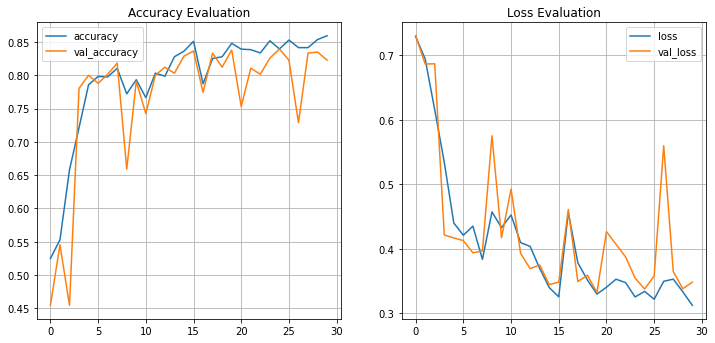

In [23]:
plt.figure(figsize = (12, 12))

plt.subplot(2, 2, 1)
plt.plot(history.history["accuracy"], label = "accuracy")
plt.plot(history.history["val_accuracy"], label = "val_accuracy")
plt.legend()
plt.grid()
plt.title("Accuracy Evaluation")

plt.subplot(2, 2, 2)
plt.plot(history.history["loss"], label = "loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.grid()
plt.legend()
plt.title("Loss Evaluation")

plt.savefig("melanoma_cancer_model_history.jpg")

# Getting the accuracy for test set

In [24]:
test_accuracy = model.evaluate(validation_generator)
print(test_accuracy)

42/42 [==============================] - 17s 395ms/step - loss: 0.3326 - accuracy: 0.8379
[0.3326205313205719, 0.8378787636756897]


In [25]:
preds = model.predict(validation_generator, verbose=1)
preds

42/42 [==============================] - 17s 385ms/step


array([[0.9235145 ],
       [0.7070867 ],
       [0.9164737 ],
       [0.33989486],
       [0.00238481],
       [0.39506817],
       [0.00195765],
       [0.43372136],
       [0.6603843 ],
       [0.08658007],
       [0.30076236],
       [0.00196722],
       [0.00182977],
       [0.9292129 ],
       [0.00257894],
       [0.00208408],
       [0.002013  ],
       [0.9995524 ],
       [0.46186435],
       [0.9067743 ],
       [0.8257071 ],
       [0.00197202],
       [0.48858377],
       [0.83611166],
       [0.002711  ],
       [0.00182486],
       [0.7741523 ],
       [0.00192812],
       [0.9143244 ],
       [0.00182059],
       [0.7880684 ],
       [0.00196502],
       [0.35494775],
       [0.64074934],
       [0.8194064 ],
       [0.652046  ],
       [0.43667936],
       [0.00192782],
       [0.7365811 ],
       [0.00182438],
       [0.7924948 ],
       [0.8766167 ],
       [0.72302157],
       [0.7965611 ],
       [0.29912716],
       [0.00507748],
       [0.93090296],
       [0.001

In [26]:
predictions = preds.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

print(predictions)

[[1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.